## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Import libraries 
import pandas as pd 
import numpy as np 
import sqlite3
import seaborn as sn
import matplotlib.pyplot as plt

# For default view 
pd.set_option("display.max_columns", 50)


## Import Data 

### IMDB Dataset 1 

In [2]:
conn = sqlite3.connect("im.db")

# Create a cursor object
cursor = conn.cursor()

# Query to list all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all results
tables = cursor.fetchall()

# Print the list of table names
print("Tables in the database:", [table[0] for table in tables])

Tables in the database: ['movie_basics', 'directors', 'known_for', 'movie_akas', 'movie_ratings', 'persons', 'principals', 'writers']


In [3]:
# loading the dataset
df_1 = pd.read_sql("""SELECT *FROM movie_basics;""",conn)

# loading the dataset
df_2 = pd.read_sql("""SELECT *FROM movie_ratings;""",conn)


### Inner join 

In [4]:
# Inner join merge df_1 and df_2
db_df = pd.merge(df_1, df_2, on = ['movie_id'], how = 'inner')
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [5]:
# Rename columns
db_df = db_df.rename(columns = {'primary_title':'title', 'movie_id':'id'})
db_df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


### Dataset 2

In [6]:
df_2 = pd.read_csv("tmdb.movies.csv")
df_2.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### Strip whitespace from strings in a column

In [7]:
# Strip white spaces in columns 
df_2.columns = df_2.columns.str.strip().str.lower().str.replace(' ', '_')

# Strip white spaces in values 
df_2 = df_2.apply(lambda col: col.str.strip() if col.dtype == ["object", "number", "category"] else col)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unnamed:_0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [8]:
df_2 = df_2.drop(columns=['unnamed:_0', 'genre_ids', 'original_language', 'popularity', 
                          'original_title','vote_count', 'id', 'vote_average' ], errors="ignore")
df_2.head()

,release_date,title
0,2010-11-19,Harry Potter and the Deathly Hallows: Part 1
1,2010-03-26,How to Train Your Dragon
2,2010-05-07,Iron Man 2
3,1995-11-22,Toy Story
4,2010-07-16,Inception


In [9]:
# Convert release date to datetime format
df_2['release_date'] = pd.to_datetime(df_2['release_date'])
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   release_date  26517 non-null  datetime64[ns]
 1   title         26517 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 414.5+ KB


In [10]:
df_2 = df_2.drop_duplicates()
df_2.duplicated().sum()

0

## Merge datasets 

In [11]:
df = pd.merge(db_df, df_2, on = ['title'], how = 'left')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75828 entries, 0 to 75827
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               75828 non-null  object        
 1   title            75828 non-null  object        
 2   original_title   75828 non-null  object        
 3   start_year       75828 non-null  int64         
 4   runtime_minutes  68101 non-null  float64       
 5   genres           75011 non-null  object        
 6   averagerating    75828 non-null  float64       
 7   numvotes         75828 non-null  int64         
 8   release_date     18893 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.2+ MB


In [12]:
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,NaT
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,NaT
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,NaT
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,NaT


In [13]:
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18268 entries, 2 to 75816
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               18268 non-null  object        
 1   title            18268 non-null  object        
 2   original_title   18268 non-null  object        
 3   start_year       18268 non-null  int64         
 4   runtime_minutes  18268 non-null  float64       
 5   genres           18268 non-null  object        
 6   averagerating    18268 non-null  float64       
 7   numvotes         18268 non-null  int64         
 8   release_date     18268 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.4+ MB


In [15]:
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01


In [16]:
df.duplicated().sum()

0

# Feature engineering 

In [17]:
def age_of_movie(value):
    if value <= 1980:
        return 'Old'
    
    elif 1928 <= value <= 2000:
        return 'Classic' 
    else:
        return 'Modern'
    
df['movie_age'] = df['start_year'].apply(age_of_movie)  
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_age
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Modern
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Modern
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Modern
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Modern
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Modern


In [18]:
def movie_duration(value):
    if value <= 60:
        return 'Short'
    
    elif 60 <= value <= 120:
        return 'Medium' 
    
    else:
        return 'Long'
    
df['movie_length'] = df['runtime_minutes'].apply(movie_duration)  
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_age,movie_length
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Modern,Long
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Modern,Medium
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Modern,Medium
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Modern,Medium
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Modern,Medium


### Weighted rating using baysian average 

In [19]:
import pandas as pd
import numpy as np

# Global average rating
C = df['averagerating'].mean()

# Minimum votes threshold (80th percentile)
m = df['numvotes'].quantile(0.8)

# Bayesian Average Function
def bayesian_average(row, C, m):
    v = row['numvotes']
    R = row['averagerating']
    return (v / (v + m) * R) + (m / (v + m) * C)

# Apply Bayesian Average to each row
df['bayesian_average'] = df.apply(lambda row: bayesian_average(row, C, m), axis=1)

# Print the result to verify
df.head()


,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_age,movie_length,bayesian_average
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Modern,Long,6.393036
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Modern,Medium,5.873616
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Modern,Medium,3.346636
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Modern,Medium,5.902448
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Modern,Medium,5.812782


In [20]:
df['title_similarity'] = (df['title'] != df['original_title']).astype(int)
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_age,movie_length,bayesian_average,title_similarity
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Modern,Long,6.393036,0
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Modern,Medium,5.873616,1
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Modern,Medium,3.346636,0
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Modern,Medium,5.902448,0
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Modern,Medium,5.812782,0


In [21]:
title = df['title_similarity'].value_counts()
title

title_similarity
0    15790
1     2478
Name: count, dtype: int64

- How title change affects rating, number of votes etc




# Seasons 


In [22]:
df['release_date'] = pd.to_datetime(df['release_date'])

df['release_date'] = pd.to_datetime(df['release_date'])

# Extract 'Year' from the 'Date' column
df['Month'] = df['release_date'].dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18268 entries, 2 to 75816
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                18268 non-null  object        
 1   title             18268 non-null  object        
 2   original_title    18268 non-null  object        
 3   start_year        18268 non-null  int64         
 4   runtime_minutes   18268 non-null  float64       
 5   genres            18268 non-null  object        
 6   averagerating     18268 non-null  float64       
 7   numvotes          18268 non-null  int64         
 8   release_date      18268 non-null  datetime64[ns]
 9   movie_age         18268 non-null  object        
 10  movie_length      18268 non-null  object        
 11  bayesian_average  18268 non-null  float64       
 12  title_similarity  18268 non-null  int64         
 13  Month             18268 non-null  int32         
dtypes: datetime64[ns](1), float

In [23]:
def categorize_seasons(month):
    
    
    if month in [12, 1, 2]:
        return 'Winter'
    
    elif month in [3, 4, 5]:
        return 'Spring'
    
    elif month in [6, 7, 8]:
        return 'Summer'
    
    elif month in [9, 10, 11]:
        return 'Fall'
    
df['season'] = df['Month'].apply(categorize_seasons)

df.head()
    

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_age,movie_length,bayesian_average,title_similarity,Month,season
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Modern,Long,6.393036,0,11,Fall
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Modern,Medium,5.873616,1,11,Fall
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Modern,Medium,3.346636,0,5,Spring
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Modern,Medium,5.902448,0,8,Summer
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Modern,Medium,5.812782,0,1,Winter


In [24]:
def movie_ratings(value):
    if value <= 4.9:
        return 'low'
    
    elif 5.0 <= value <= 7.9:
        return 'Average' 
    
    else:
        return 'High'
    
df['movie_rating'] = df['averagerating'].apply(movie_ratings)  
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_age,movie_length,bayesian_average,title_similarity,Month,season,movie_rating
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Modern,Long,6.393036,0,11,Fall,Average
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Modern,Medium,5.873616,1,11,Fall,low
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Modern,Medium,3.346636,0,5,Spring,low
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Modern,Medium,5.902448,0,8,Summer,Average
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Modern,Medium,5.812782,0,1,Winter,low


## Genre list 

In [25]:
df['genres'] = df['genres'].str.split(',') # This splits the genres into a list
genres_expanded = df['genres'].apply(pd.Series) # This expands the list into columns
genres_expanded = genres_expanded.rename(columns = lambda x : f'genre_{x+1}') # Rename the column

# Concatenate the new columns with the original DataFrame
df = pd.concat([df, genres_expanded], axis=1)
df = df.drop(columns = ['genres'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18268 entries, 2 to 75816
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                18268 non-null  object        
 1   title             18268 non-null  object        
 2   original_title    18268 non-null  object        
 3   start_year        18268 non-null  int64         
 4   runtime_minutes   18268 non-null  float64       
 5   averagerating     18268 non-null  float64       
 6   numvotes          18268 non-null  int64         
 7   release_date      18268 non-null  datetime64[ns]
 8   movie_age         18268 non-null  object        
 9   movie_length      18268 non-null  object        
 10  bayesian_average  18268 non-null  float64       
 11  title_similarity  18268 non-null  int64         
 12  Month             18268 non-null  int32         
 13  season            18268 non-null  object        
 14  movie_rating      18268 non

In [27]:
df.columns

Index(['id', 'title', 'original_title', 'start_year', 'runtime_minutes',
       'averagerating', 'numvotes', 'release_date', 'movie_age',
       'movie_length', 'bayesian_average', 'title_similarity', 'Month',
       'season', 'movie_rating', 'genre_1', 'genre_2', 'genre_3'],
      dtype='object')

In [28]:
from collections import Counter
import pandas as pd

# Combine genres and show the value counts
all_genres = df[['genre_1', 'genre_2', 'genre_3']].stack().dropna()
genre_counts = Counter(all_genres)
print(f"Genre Counts {genre_counts}") 

# Aggregate by numvotes and averagerating
genre_aggregates = (
    df[['genre_1', 'genre_2', 'genre_3', 'numvotes', 'averagerating']]
    .melt(id_vars = ['numvotes', 'averagerating'], value_vars=['genre_1', 'genre_2', 'genre_3'], value_name='genre')
    .dropna()
    .groupby('genre')
    .agg({'numvotes': 'sum', 'averagerating': 'mean'})
    .sort_values(by='numvotes', ascending=False)
)
print("Aggregated Data")
print(genre_aggregates)

Genre Counts Counter({'Drama': 8421, 'Comedy': 4169, 'Thriller': 3414, 'Documentary': 3328, 'Horror': 3142, 'Action': 2310, 'Romance': 1844, 'Crime': 1701, 'Adventure': 1325, 'Mystery': 1196, 'Biography': 1087, 'Sci-Fi': 990, 'Family': 815, 'Fantasy': 695, 'History': 632, 'Music': 478, 'Animation': 452, 'Sport': 357, 'War': 226, 'News': 151, 'Musical': 143, 'Western': 118, 'Reality-TV': 3, 'Game-Show': 1, 'Adult': 1})
Aggregated Data
              numvotes  averagerating
genre                                
Drama        117710583       6.110224
Action        99238248       5.433636
Adventure     86060262       5.869585
Comedy        71260432       5.806213
Thriller      50304499       5.222994
Sci-Fi        43584949       5.113030
Crime         39853576       5.842387
Fantasy       26600025       5.598561
Mystery       26177698       5.583528
Horror        25334949       4.678867
Romance       25243346       6.027657
Biography     21270551       6.973321
Animation     16958728       6

In [29]:
genre_aggregates['cumulative_votes'] = genre_aggregates['numvotes'].cumsum() / genre_aggregates['numvotes'].sum() * 100
genre_aggregates['cumulative_rating'] = genre_aggregates['averagerating'].cumsum() / genre_aggregates['averagerating'].sum() * 100


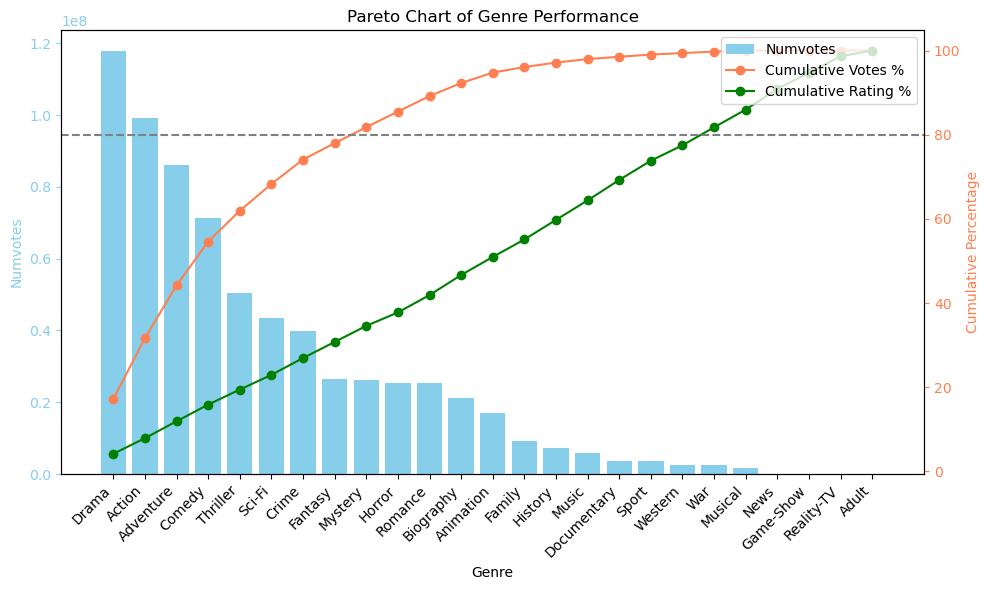

In [30]:
# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for numvotes
ax1.bar(genre_aggregates.index, genre_aggregates['numvotes'], color='skyblue', label='Numvotes')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Numvotes', color='skyblue')
ax1.tick_params('y', colors='skyblue')
plt.xticks(rotation=45, ha='right')
ax2 = ax1.twinx()

# Line chart for cumulative percentages
ax2.plot(genre_aggregates.index, genre_aggregates['cumulative_votes'], color='coral', marker='o', label='Cumulative Votes %')
ax2.plot(genre_aggregates.index, genre_aggregates['cumulative_rating'], color='green', marker='o', label='Cumulative Rating %')
ax2.set_ylabel('Cumulative Percentage', color='coral')
ax2.tick_params('y', colors='coral')

# Adding horizontal lines at the 80% level
ax2.axhline(80, color='gray', linestyle='--')
# Title and legend
plt.title('Pareto Chart of Genre Performance')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax2.transAxes)
# Adjust layout and show the plot
plt.tight_layout()
plt.show()